Data Load

In [94]:
import pandas as pd, numpy as np
from scipy.io.arff import loadarff

data = loadarff('diabetes.arff')
df = pd.DataFrame(data[0])
df['Outcome'] = df['Outcome'].str.decode('utf-8')


1.

In [95]:
# ANOVA score computation
                
from sklearn.feature_selection import f_classif     

X = df.drop('Outcome', axis=1)
y = df['Outcome']

f_statistics = f_classif(X, y)

sc_ft = {f_statistics[0][_]:X.columns.values[_] for _ in range(f_statistics[0].size)}
worst_disc_pw = min(f_statistics[0])
best_disc_pw = max(f_statistics[0])

The input variable with the worst discriminative power: BloodPressure (3.26)


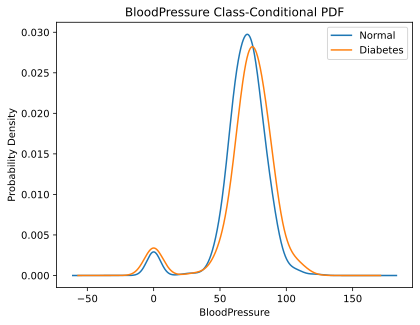

In [164]:
# Worst discriminative power

%config InlineBackend.figure_formats = ['svg']

from matplotlib import pyplot

print(f'The input variable with the worst discriminative power: {sc_ft[worst_disc_pw]} ({round(worst_disc_pw, 2)})')

df[df['Outcome'] == '0'][f'{sc_ft[worst_disc_pw]}'].plot.kde(label='Normal')
df[df['Outcome'] == '1'][f'{a[worst_disc_pw]}'].plot.kde(label='Diabetes')

pyplot.title(f'{sc_ft[worst_disc_pw]} Class-Conditional PDF')
pyplot.xlabel(f'{sc_ft[worst_disc_pw]}')
pyplot.ylabel('Probability Density')
pyplot.legend()
pyplot.savefig('images/BloodPressure Class-Conditional PDF.png')
pyplot.show()

The input variable with the best discriminative power: Glucose (213.16)


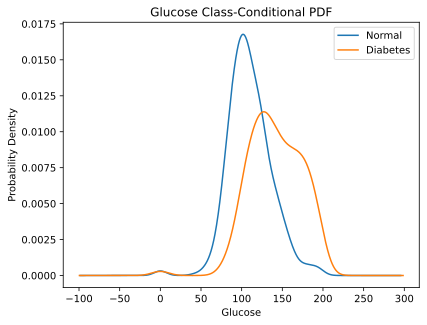

In [165]:
# Best discriminative power

%config InlineBackend.figure_formats = ['svg']

print(f'The input variable with the best discriminative power: {sc_ft[best_disc_pw]} ({round(best_disc_pw, 2)})')

df[df['Outcome'] == '0'][f'{sc_ft[best_disc_pw]}'].plot.kde(label='Normal')
df[df['Outcome'] == '1'][f'{sc_ft[best_disc_pw]}'].plot.kde(label='Diabetes')

pyplot.title(f'{sc_ft[best_disc_pw]} Class-Conditional PDF')
pyplot.xlabel(f'{sc_ft[best_disc_pw]}')
pyplot.ylabel('Probability Density')
pyplot.legend()
pyplot.savefig('images/Glucose Class-Conditional PDF.png')
pyplot.show()

2.

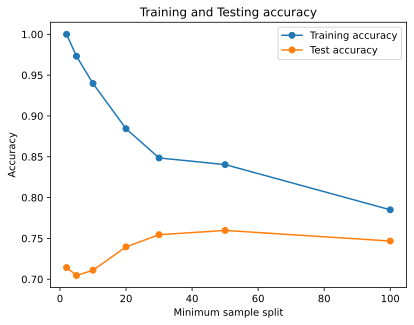

In [166]:
# Decision tree training and testing accuracy computation and plotting of the graph

%config InlineBackend.figure_formats = ['svg']

from sklearn import metrics, tree
from sklearn.model_selection import train_test_split

min_values = [2, 5, 10, 20, 30, 50, 100]
train_accs, test_accs = [], []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

for m in min_values:
    train_m_accs, test_m_accs = [], []      
    for _ in range(10):
        predictor = tree.DecisionTreeClassifier(min_samples_split=m)
        predictor.fit(X_train, y_train)

        train_m_accs.append(metrics.accuracy_score(y_train, predictor.predict(X_train)))
        test_m_accs.append(metrics.accuracy_score(y_test, predictor.predict(X_test)))
    
    train_accs.append(np.mean(train_m_accs))
    test_accs.append(np.mean(test_m_accs))

pyplot.plot(min_values, train_accs, 'o-', label='Training accuracy')
pyplot.plot(min_values, test_accs, 'o-', label='Test accuracy')
pyplot.title('Training and Testing accuracy')
pyplot.xlabel('Minimum sample split')
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.savefig('images/Training and Testing accuracy.png')
pyplot.show()

4.

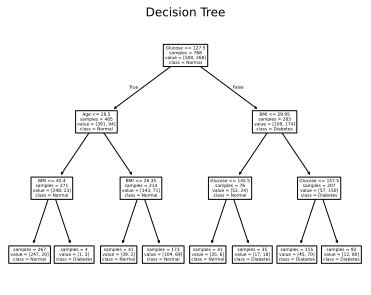

In [172]:
# Decision tree plotting

%config InlineBackend.figure_formats = ['svg']

predictor = tree.DecisionTreeClassifier(max_depth=3, random_state=1)
predictor.fit(X, y)

tree.plot_tree(predictor, feature_names=df.columns, class_names=['Normal', 'Diabetes'], impurity=False)
pyplot.title('Decision Tree')
pyplot.savefig('images/Decision Tree.png')
pyplot.savefig('images/Decision Tree.svg')
pyplot.show()